_Técnicas de Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Caso Grupal: Clasificación de mensajes de odio

## Objetivos

Mediante este trabajo se pretende que el estudiante ponga en práctica la aplicación de un proceso completo de machine learning a la clasificación de mensajes de odio.

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

## EDA

En este caso el tipo de aprendizaje automático que se pretende resolver es la clasificación de mensajes de odio con múltiples categorías. El objetivo es entrenar un modelo que pueda identificar mensajes de odio basándose en las características textuales de los mensajes.

### Análisis Previos Necesarios

Para saber si es posible construir el modelo deseado, se deben realizar el poceso de análisis exploratorio de los datos teniendo en cuenta las adaptaciones previas realizadas sobre los datos:

   * Comprensión de los Datos: Familiarizarse con el conjunto de datos, las variables incluidas y sus significados.
   * Distribución de Clases: Analizar la distribución de la variable objetivo (sentimiento) para asegurarnos de que las clases estén balanceadas.
   * Análisis de Características: Evaluar las características individuales (A, B, C, D, E) y sus versiones estandarizadas (At, Bt, Ct, Dt, Et).
   * Correlación de Variables: Examinar la correlación entre las características para identificar multicolinealidad.
   * Valores Faltantes y Atípicos: Identificar y tratar valores faltantes y atípicos.
   * Visualización de Datos: Utilizar gráficos para visualizar la distribución de características y la variable objetivo.
   * Preparación de Datos: Estandarizar o normalizar las características si es necesario.

Se cargaran los datos y se realizará un análisis exploratorio de los datos (EDA) inicialmente para comprender mejor el conjunto de datos.

In [1]:
# coloca tu código y respuestas del punto 1 en esta sección
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns 

# Ruta al conjunto de datos
file_path = 'out.csv'

# Carga del conjunto de datos
df = pd.read_csv(file_path)

# Muestra de los primeros 5 registros
print(df.head())



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   A   B   C  D  E                                         comentario  label  \
0  2  64  30  0  2  pandemia,originado,covid,cierto,incidencia,aba...    0.0   
1  4  70  21  0  0  ser,mes,larga,espera,llegar,momento,siempre,pr...    0.0   
2  4  88  50  0  0  cartagena,san,sebastiar,fuengirola,irun,orense...    0.0   
3  3  38  21  0  0  pleno,dia,verano,calor,plan,mas,apetecibl,disf...    0.0   
4  0  59  17  0  0  pasado,junio,celebro,dia,luchar,frente,leishma...    0.0   

        A_t       B_t        C_t  ...    Valor_1    Valor_2   Valor_3  \
0  1.851102  2.759647   7.145831  ...   5.108388  13.227660 -0.771127   
1  3.990202  3.054765   4.877255  ...  12.189130  19.461233 -1.662227   
2  3.990202  3.940120  12.187108  ...  15.721875  48.629021 -1.662227   
3  2.920652  1.480801   4.877255  ...   4.324903  

In [16]:
# Información general del conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           10000 non-null  int64  
 1   B           10000 non-null  int64  
 2   C           10000 non-null  int64  
 3   D           10000 non-null  int64  
 4   E           10000 non-null  int64  
 5   comentario  10000 non-null  object 
 6   label       10000 non-null  float64
 7   A_t         10000 non-null  float64
 8   B_t         10000 non-null  float64
 9   C_t         10000 non-null  float64
 10  D_t         10000 non-null  float64
 11  E_t         10000 non-null  float64
 12  Valor_1     10000 non-null  float64
 13  Valor_2     10000 non-null  float64
 14  Valor_3     10000 non-null  float64
 15  Valor_4     10000 non-null  float64
 16  Valor_5     10000 non-null  float64
 17  Valor_6     10000 non-null  float64
 18  Valor_7     10000 non-null  float64
 19  Valor_8     10000 non-null

In [2]:
# Descripción del conjunto de datos
print(df.describe())

,A,B,C,D,E,label,A_t,B_t,C_t,D_t,...,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.957400,26.098100,5.674600,0.091300,2.200600,0.500000,0.735989,0.895389,1.014276,-0.241571,...,2.448370,2.515129,-0.222304,-0.324603,3.343632,-0.302639,-0.756762,-0.286422,-0.357238,-0.050935
std,1.741864,34.012341,7.317149,0.352671,2.729488,0.500025,1.863010,1.672944,1.844389,0.676008,...,8.690527,9.827254,1.160914,1.547278,10.567912,1.045447,0.885760,1.218960,1.297408,1.129825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.287998,-0.388282,-0.416086,-0.416577,...,-2.197166,-3.582457,-10.573231,-11.207779,-1.393841,-6.558948,-8.362074,-9.067027,-11.559651,-5.886890
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.287998,-0.339096,-0.164022,-0.416577,...,-0.086494,-0.097950,-0.432068,-0.686619,-0.025057,-0.760297,-0.943189,-0.561697,-0.716113,-0.993166
50%,0.000000,5.000000,3.000000,0.000000,0.000000,0.500000,-0.287998,-0.142350,0.340105,-0.416577,...,0.097659,0.047238,0.119973,-0.415081,0.063687,-0.043150,-0.808442,-0.141680,-0.314500,0.221244
75%,1.000000,46.000000,7.000000,0.000000,6.000000,1.000000,0.781552,1.874292,1.348361,-0.416577,...,1.157323,0.659812,0.119973,0.152955,2.527222,0.141260,-0.314174,0.068328,0.087112,0.221244
max,24.000000,328.000000,88.000000,6.000000,6.000000,1.000000,25.381200,15.744855,21.765536,11.084360,...,332.263677,246.545947,21.283302,60.511589,331.989523,20.009412,19.361276,28.053013,23.045933,17.286505


* La variable A es Conteo de palabras positivas en el mensaje. Esta variable muestra una gran asimetría hacia los valores más pequeños lo que significa que tenemos una baja participación de palabras positivas en los comentarios. Conla presencia de comentarios atípicos desde esta variable con hasta 24 palabras de este tipo.
* B es el conteo de palabras negativas. En contraste con las palabras positivas, este conteo tiene una distribución menos asimétrica, con mucha mayor variabilidad y comentarios tambien atípicos con hasta 328 palabras negativas.
* C es el conteo del número de bigrams más comunes. Los bigramas más comunes es tambien una variable asimétrica.
* D es el conteo del número de menciones a otros usuarios. Esta variable con un rango claramente inferior a las variables anteriores y con una fuerte asimetría.
* E es la ctegoría del sentimiento. Por supuesto esta es una variable con nivel de medición nominal, para la cual estas medidas no tienen ningún sentido. Corresponde transformarla más adelante para su correcto uso

Todo lo anterior justifica la estandarización de las variables para manejar una misma escala

Por otro lado, At,...Et, son las variables mencionadas anteriormente, pero estandarizadas.

Por último, Valor1,..Valor10, son combinaciones de las características en multiplicación (A*B, A*C,...B*C,...D*E).

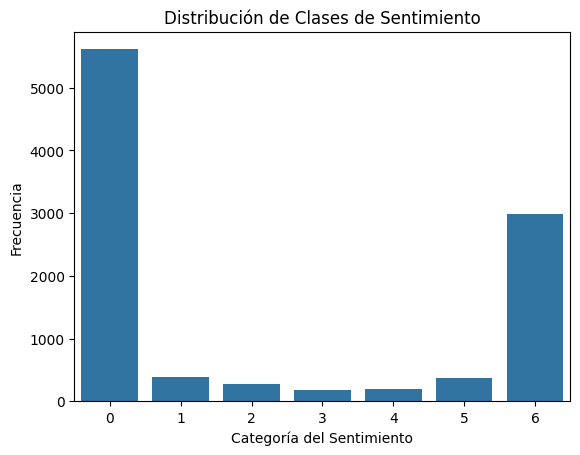

In [4]:
# Distribución de la variable objetivo (sentimiento)
class_distribution = df['E'].value_counts()
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Categoría del Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases de Sentimiento')
plt.show()

Se observa un claro debalanceo de las 7 categorias por lo cual se sugiere utilizar, particularmente para las clases 0 y 6 (Alegría (joy) y Neutral). El resto de niveles presentan una participación similar, por debajo de los mil comentarios. Estas categorías son:
1. Tristeza (sadness)
2. Enfado (anger)
3. Sorpresa (surprise)
4. Miedo (fear)
5. Disgusto (disgust)

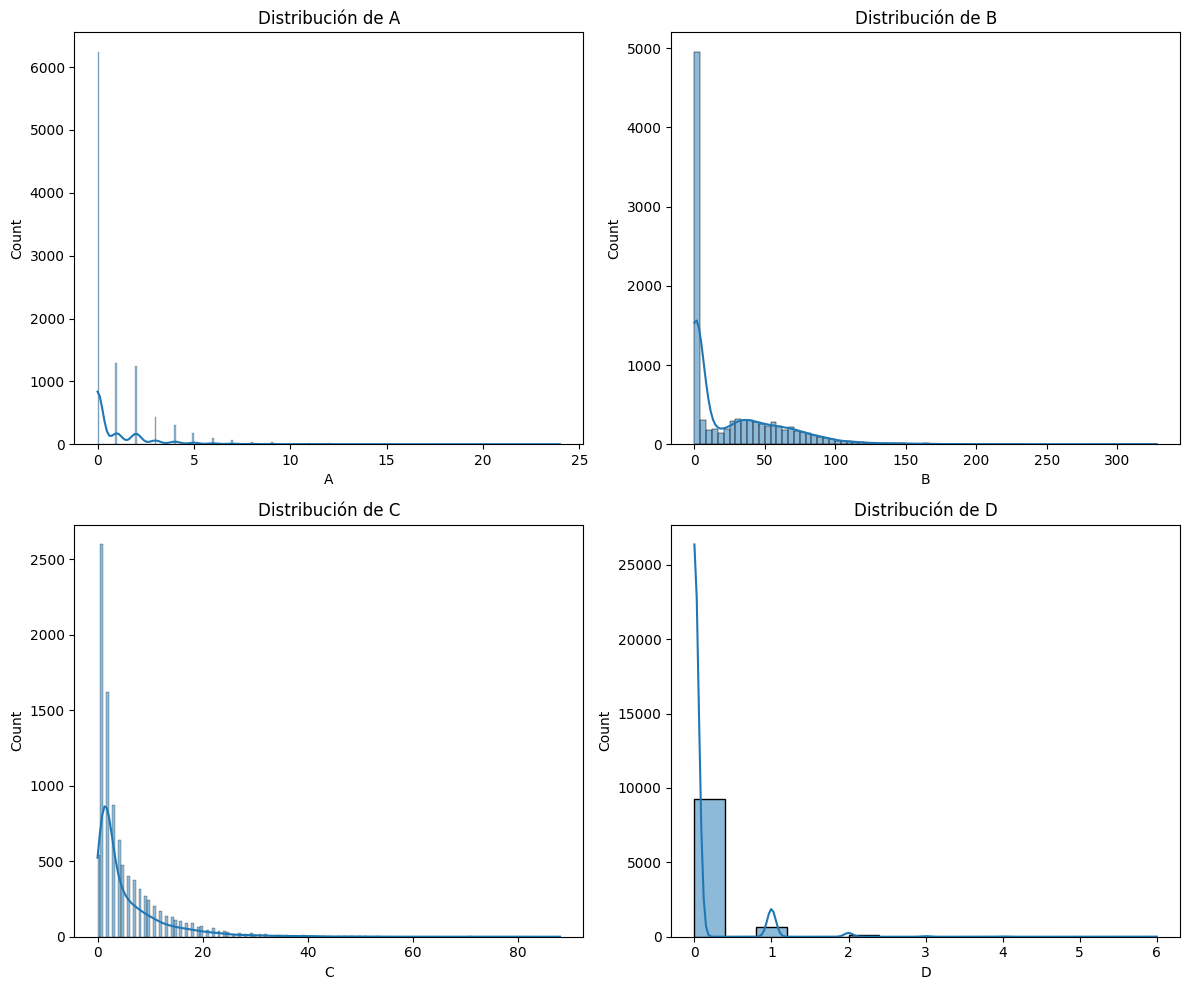

In [5]:
# Distribución de las características A, B, C, D
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['A'], kde=True, ax=axes[0, 0]).set(title='Distribución de A')
sns.histplot(df['B'], kde=True, ax=axes[0, 1]).set(title='Distribución de B')
sns.histplot(df['C'], kde=True, ax=axes[1, 0]).set(title='Distribución de C')
sns.histplot(df['D'], kde=True, ax=axes[1, 1]).set(title='Distribución de D')
plt.tight_layout()
plt.show()


Como se señalaba en el análisis de las medidas de tendencia central arriba se puede ahora ver de manera gráfica los diferentes tipos de asimetría en las variables explicatorias y esto justifica su estandarización.

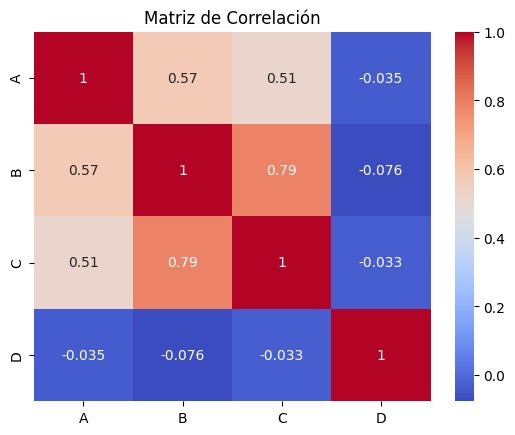

In [6]:
# Correlación entre las características A, B, C, D 
variables_numericas = ['A', 'B', 'C', 'D']
correlation_matrix = df[variables_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()




Las correlaciones entre las variables A, B y C indican que se podrían tener inconvenientes de colinealidad porlo que se debe tener en cuenta esta característica a la hora de seleccionar la metodolofías correspondientes.

In [7]:
# Medir la asociación entre las características A, B, C, D y la variable objetivo E
from scipy.stats import chi2_contingency

# Tabla de contingencia
contingency_table = pd.crosstab(df['A'], df['E'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value para A: {p}')

contingency_table = pd.crosstab(df['B'], df['E'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value para B: {p}')

contingency_table = pd.crosstab(df['C'], df['E'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value para C: {p}')

contingency_table = pd.crosstab(df['D'], df['E'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'p-value para D: {p}')


p-value para A: 1.0981787102480732e-256
p-value para B: 0.0
p-value para C: 0.0
p-value para D: 2.286101249040423e-13


Se obtienen valor práctiamente de cero para cada par de asociacione por lo que son importantes estas variables para explicar el tipo de sentimiento

A             0
B             0
C             0
D             0
E             0
comentario    0
label         0
A_t           0
B_t           0
C_t           0
D_t           0
E_t           0
Valor_1       0
Valor_2       0
Valor_3       0
Valor_4       0
Valor_5       0
Valor_6       0
Valor_7       0
Valor_8       0
Valor_9       0
Valor_10      0
dtype: int64


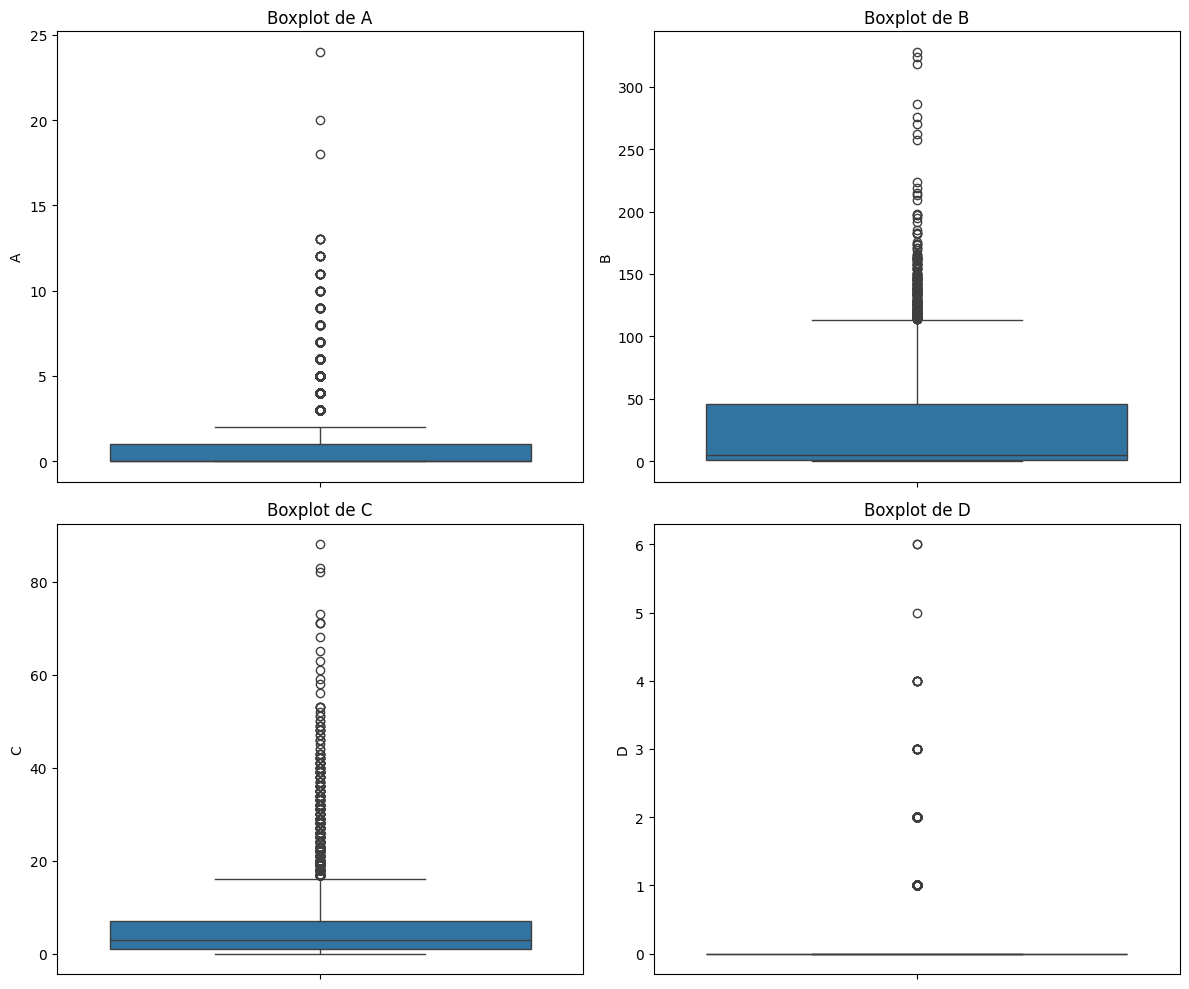

In [8]:
# Valores faltantes
missing_values = df.isnull().sum()
print(missing_values)

# Identificación de valores atípicos usando boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(df['A'], ax=axes[0, 0]).set(title='Boxplot de A')
sns.boxplot(df['B'], ax=axes[0, 1]).set(title='Boxplot de B')
sns.boxplot(df['C'], ax=axes[1, 0]).set(title='Boxplot de C')
sns.boxplot(df['D'], ax=axes[1, 1]).set(title='Boxplot de D')
plt.tight_layout()
plt.show()


Los diagramas de caja ilustran de nuevo la asimetría y los valores atípicos, por lo que se sugiere realizar transformaciones logarítmicas de las variables A, B, C y D.
De acuerdo con lo mencionado no se tienen valores nulos

In [9]:
import numpy as np

# Transformación logarítmica
df['log_A'] = np.log(df['A'] + 1)
df['log_B'] = np.log(df['B'] + 1)
df['log_C'] = np.log(df['C'] + 1)
df['log_D'] = np.log(df['D'] + 1)

# Eliminar las variables originales y la variable respuesta
variables_a_eliminar = ['A', 'B', 'C', 'D', 'E','comentario', 'label']
X = df.drop(columns=variables_a_eliminar)
y = df['E']

# Mostrar las primeras filas del DataFrame actualizado
X.head()


,A_t,B_t,C_t,D_t,E_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10,log_A,log_B,log_C,log_D
0,1.851102,2.759647,7.145831,-0.416577,0.440638,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560,1.098612,4.174387,3.433987,0.0
1,3.990202,3.054765,4.877255,-0.416577,-0.531099,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244,1.609438,4.262680,3.091042,0.0
2,3.990202,3.940120,12.187108,-0.416577,-0.531099,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244,1.609438,4.488636,3.931826,0.0
3,2.920652,1.480801,4.877255,-0.416577,-0.531099,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244,1.386294,3.663562,3.091042,0.0
4,-0.287998,2.513715,3.869000,-0.416577,-0.531099,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244,0.000000,4.094345,2.890372,0.0


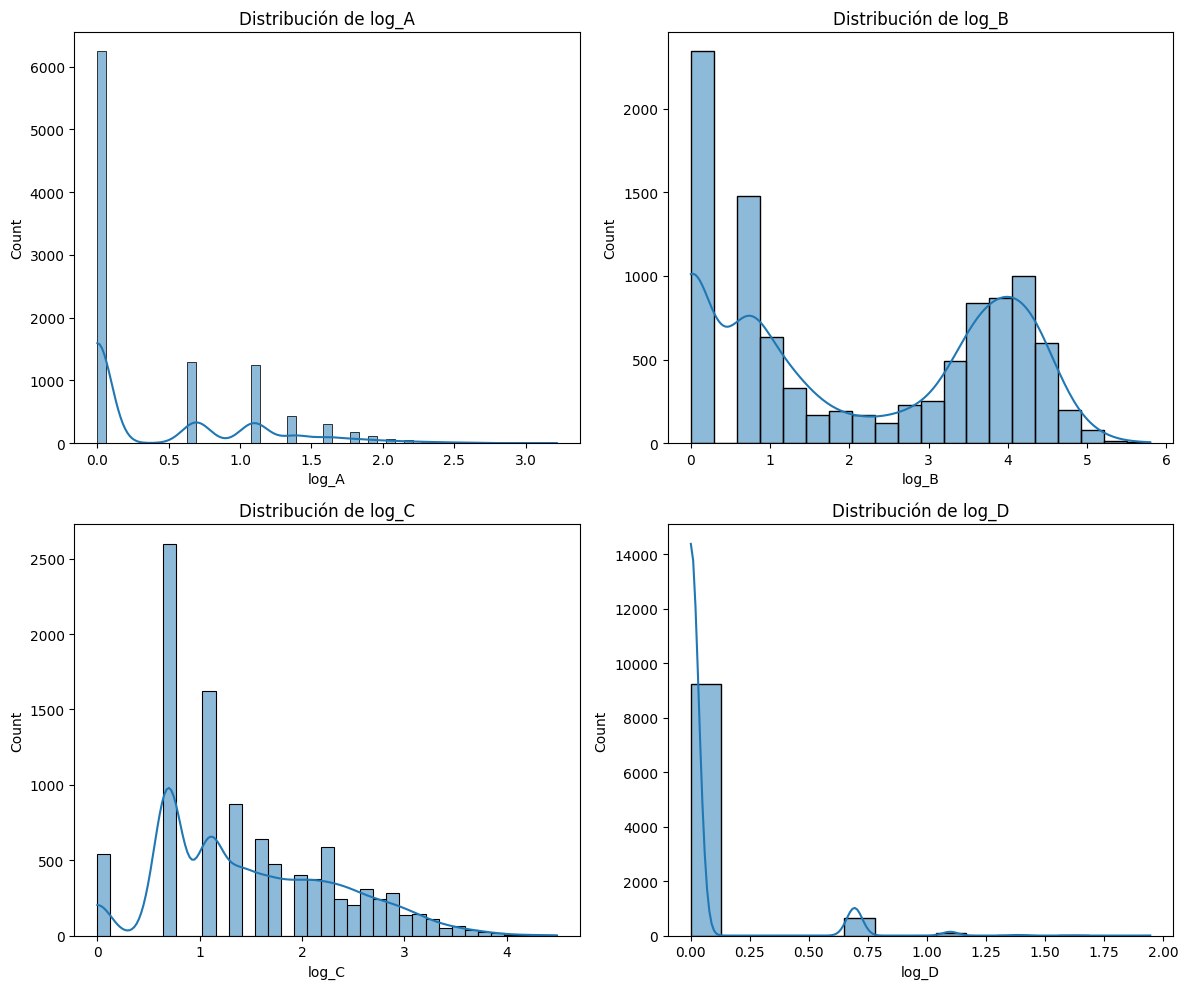

In [14]:
# Graficar los histograms de las variables transformadas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['log_A'], kde=True, ax=axes[0, 0]).set(title='Distribución de log_A')
sns.histplot(df['log_B'], kde=True, ax=axes[0, 1]).set(title='Distribución de log_B')
sns.histplot(df['log_C'], kde=True, ax=axes[1, 0]).set(title='Distribución de log_C')
sns.histplot(df['log_D'], kde=True, ax=axes[1, 1]).set(title='Distribución de log_D')
plt.tight_layout()
plt.show()



Sin duda estas variables transformadas le permitiran al modelos discriminar mejor 

In [13]:
# mostrar las primeras 5 filas de la variable objetivo
y.head()


0    2
1    0
2    0
3    0
4    0
Name: E, dtype: int64

## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

In [10]:
# División del conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19650512)

Se trabajará un modelo naive Bayes como referencia, de acuerdo a lo aprendido en clases un modelo que pretenda ser utilizado de manera eficiente debe tener la capacidad de superar al menos a un naibe Bayes. En segundo lugar se escoge una regresión logística, por ser un modelo clásico y de facil interpretación. Finalmente un Random Forest, por el prestigio que han venido teniendo los modelos de ensamble y los resultado obtenidos en la actividad 2, de este mismo curso.

Todo esto sabiendo que se enfrenta un gran problema de desbalanceo en las categorías de la variable respuesta

Dimensiones del conjunto de entrenamiento: (7000, 19)
Dimensiones del conjunto de prueba: (3000, 19)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.99      0.99      0.99       114
           2       0.99      0.98      0.98        81
           3       0.95      0.98      0.96        53
           4       0.96      0.86      0.91        56
           5       0.93      0.98      0.95       113
           6       1.00      1.00      1.00       893

    accuracy                           0.99      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.99      0.99      0.99      3000



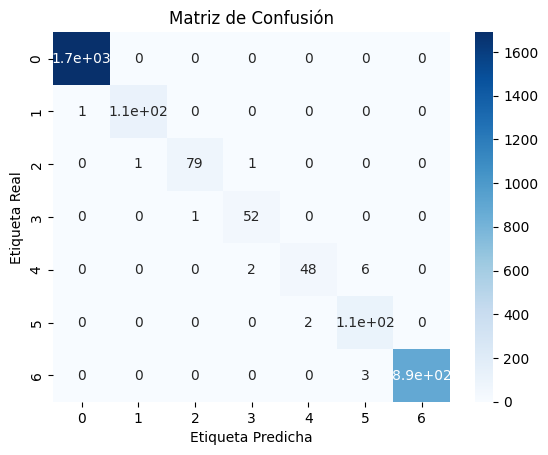

In [15]:
# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Dimensiones del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensiones del conjunto de prueba: {X_test.shape}')

# Entrenamiento de un modelo de regresión logística
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Predicción de las etiquetas de prueba
y_pred = logistic_regression.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Matriz de confusión
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()


Etos resultados están muy sospechosos, las métricas de evaluación son exageradamente buenas. Esto está raro

In [21]:
# unificar el conjunto y_test y y_pred en un DataFrame
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=['E_pred']).reset_index(drop=True)
df_comparison = pd.concat([y_test_df, y_pred_df], axis=1)
df_comparison.head(20)

,E,E_pred
0,0,0
1,0,0
2,6,6
3,6,6
4,0,0
5,0,0
6,0,0
7,5,5
8,6,6
9,0,0


In [17]:
# Importancia de las características
importance = logistic_regression.coef_[0]
feature_importance = pd.DataFrame(importance, index=X.columns, columns=['Importancia'])
feature_importance = feature_importance.sort_values(by='Importancia', ascending=False)
print(feature_importance)


          Importancia
Valor_10     1.651872
log_B        0.403363
Valor_6      0.231295
A_t          0.174372
Valor_3      0.161986
Valor_2      0.126437
log_A        0.124229
C_t          0.118787
D_t          0.111257
Valor_5     -0.032092
Valor_8     -0.047595
Valor_1     -0.069512
log_C       -0.268941
log_D       -0.408990
B_t         -0.452513
Valor_4     -0.922824
Valor_7     -1.154961
Valor_9     -3.530727
E_t        -16.732008


### Esto fue sin duda una experiencia única, nunca habia tenido un ejercicio con estas métricas. Me ha tomado mucho tiempo y pido disculpas porque no estoy alcanzado a realizar todo el trabajo

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inicializar los modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluación del modelo: {name}")
    print(classification_report(y_test, y_pred))



Evaluación del modelo: Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       1.00      1.00      1.00       114
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       893

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Evaluación del modelo: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.99      0.99      0.99       114
           2       0.99      0.98      0.98        81
           3       0.95      0.98      0.96        53
           4       0.96      0.86      0.91        56


Esto sigue siendo increible, la verdad no entiendo porque estas métricas tan buenas.

## EVALUACIÓN DE LOS MODELOS Y COMPARATIVA

In [ ]:
# coloca tu código y respuestas del punto 3 en esta sección